# AutoEncoder Training

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

all_input_data = []
cnt = 0
data = pd.read_csv("aug_weathered_5plastics_baselineCorr.csv")
scaler = MinMaxScaler(feature_range=(0, 1))  # Normalize between 0 and 1
wave_numbers = data.columns[2:]
spectra = data.iloc[:, 2:]
# Loop through all the files in the input folder
for col in range (len(spectra)):
    y = spectra.iloc[col].values.astype(float)
    # Read the file assuming space-separated values
    temp = y.reshape(-1, 1)
    
    # Normalize between 0 and 1
    temp = scaler.fit_transform(temp)
    
    # Flatten to 1D and store
    temp = temp.reshape(1, -1)
    
      # Append to the list
    all_input_data.append(temp)
    cnt += 1 


In [2]:
X = np.array(all_input_data)
Y= np.array(all_input_data)

In [3]:
print(X.shape)
print(Y.shape)


(335, 1, 1412)
(335, 1, 1412)


In [4]:
from keras.layers import Input, Dense
from keras.models import Model

# Define the input shape
input_shape = (1,1412)

# Define the encoder architecture
input_layer = Input(shape=input_shape)
encoded = Dense(1412, activation='relu')(input_layer)
encoded = Dense(1024,activation='relu')(encoded)
encoded = Dense(512, activation='relu')(encoded)
encoded = Dense(256, activation='relu')(encoded)
encoded = Dense(128, activation='relu')(encoded)
# Latent Space
latent_space = Dense(64,activation='relu')(encoded) # Assign to a variable

# Define the decoder architecture (same as before)
decoded = Dense(128, activation='relu')(latent_space) # Use latent_space here
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(512, activation='relu')(decoded)
decoded = Dense(1024,activation='relu')(decoded)
decoded = Dense(1412)(decoded) 

# Combine encoder and decoder into an autoencoder model
autoencoder = Model(input_layer, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Print summary of the autoencoder architecture
autoencoder.summary()

# Create a separate model for the encoder (latent space output)
encoder_model = Model(input_layer, latent_space)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 1412)]         0         
                                                                 
 dense (Dense)               (None, 1, 1412)           1995156   
                                                                 
 dense_1 (Dense)             (None, 1, 1024)           1446912   
                                                                 
 dense_2 (Dense)             (None, 1, 512)            524800    
                                                                 
 dense_3 (Dense)             (None, 1, 256)            131328    
                                                                 
 dense_4 (Dense)             (None, 1, 128)            32896     
                                                                 
 dense_5 (Dense)             (None, 1, 64)             8256  

In [5]:
encoder_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 1412)]         0         
                                                                 
 dense (Dense)               (None, 1, 1412)           1995156   
                                                                 
 dense_1 (Dense)             (None, 1, 1024)           1446912   
                                                                 
 dense_2 (Dense)             (None, 1, 512)            524800    
                                                                 
 dense_3 (Dense)             (None, 1, 256)            131328    
                                                                 
 dense_4 (Dense)             (None, 1, 128)            32896     
                                                                 
 dense_5 (Dense)             (None, 1, 64)             8256

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42,shuffle=True)

In [7]:
history=autoencoder.fit(X_train,X_train,validation_data=(X_test, X_test),batch_size=32,epochs=200)

Epoch 1/200
9/9 [==============================] - 2s 56ms/step - loss: 0.0757 - val_loss: 0.0252
Epoch 2/200
9/9 [==============================] - 0s 20ms/step - loss: 0.0273 - val_loss: 0.0235
Epoch 3/200
9/9 [==============================] - 0s 19ms/step - loss: 0.0215 - val_loss: 0.0198
Epoch 4/200
9/9 [==============================] - 0s 22ms/step - loss: 0.0192 - val_loss: 0.0182
Epoch 5/200
9/9 [==============================] - 0s 17ms/step - loss: 0.0184 - val_loss: 0.0181
Epoch 6/200
9/9 [==============================] - 0s 16ms/step - loss: 0.0179 - val_loss: 0.0177
Epoch 7/200
9/9 [==============================] - 0s 17ms/step - loss: 0.0176 - val_loss: 0.0173
Epoch 8/200
9/9 [==============================] - 0s 18ms/step - loss: 0.0168 - val_loss: 0.0153
Epoch 9/200
9/9 [==============================] - 0s 18ms/step - loss: 0.0145 - val_loss: 0.0144
Epoch 10/200
9/9 [==============================] - 0s 18ms/step - loss: 0.0136 - val_loss: 0.0125
Epoch 11/200
9/9 [=

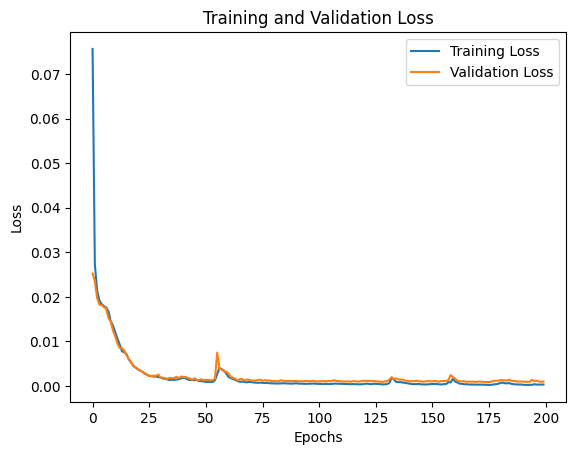

In [8]:
import matplotlib.pyplot as plt

# Plot the training loss
plt.plot(history.history['loss'], label='Training Loss')

# Check if validation loss is available and plot it
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [9]:
from tensorflow.keras.models import save_model

save_model(encoder_model, 'latest_latest.h5')


In [ ]:
from keras.models import load_model

encoder_model = load_model("latest_latest.h5")
encoder_model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 1, 1412)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1, 1412)        │     1,995,156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1, 1024)        │     1,446,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1, 512)         │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1, 256)         │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1, 128)         │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1, 64)          │         8,256 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,139,348 (15.79 MB)

 Trainable params: 4,139,348 (15.79 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
encoder_model.get_layer(index=6).get_weights()[0].shape

(128, 64)